In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
import matplotlib.colors as mcolors


def symmetrical_colormap(cmap_settings, new_name = None ):
    ''' This function take a colormap and create a new one, as the concatenation of itself by a symmetrical fold.
    '''
    # get the colormap
    cmap = plt.cm.get_cmap(*cmap_settings)
    if not new_name:
        new_name = "sym_"+cmap_settings[0]  # ex: 'sym_Blues'
    
    # this defined the roughness of the colormap, 128 fine
    n= 128 
    
    # get the list of color from colormap
    colors_r = cmap(np.linspace(0, 1, n))    # take the standard colormap # 'right-part'
    colors_l = colors_r[::-1]                # take the first list of color and flip the order # "left-part"

    # combine them and build a new colormap
    colors = np.vstack((colors_l, colors_r))
    mymap = mcolors.LinearSegmentedColormap.from_list(new_name, colors)

    return mymap
cmap_settings = ('inferno', None)  # provide int instead of None to "discretize/bin" the colormap
mymap = symmetrical_colormap(cmap_settings= cmap_settings, new_name =None )

In [3]:
# test_label = pd.read_csv('../outputs/microsoft_activity_new/EXP3000/cv0_test_label.csv')

In [4]:
# test_label_df = test_label.groupby('label').head(1)[['label','CLASS_LABEL']]
# # set CLASS_LABEL as key and label as value
# test_label_dict = dict(zip(test_label_df['CLASS_LABEL'],test_label_df['label']))
test_label_dict = {0: 'Bicep Curl',
 3: 'Plank',
 4: 'Pushups',
 5: 'Squat',
 7: 'Squat Jump',
 8: 'Walk',
 9: 'Walking lunge',
 2: 'Jump Rope',
 1: 'Biceps Curl (band)',
 6: 'Squat (hands behind head)'}
test_label_dict

{0: 'Bicep Curl',
 3: 'Plank',
 4: 'Pushups',
 5: 'Squat',
 7: 'Squat Jump',
 8: 'Walk',
 9: 'Walking lunge',
 2: 'Jump Rope',
 1: 'Biceps Curl (band)',
 6: 'Squat (hands behind head)'}

In [5]:
# convert gilon_speed npy
cv_num= 2
speed_attention_csv = pd.read_csv(f'dataset/ms_activity/channel_attention_scores.csv')
# speed_attention_csv = pd.read_csv(f'results/gilon_speed/channel_attention_scores.csv')
# collceted from simplevit ->cv 3. 

y_true_unique = speed_attention_csv['y_true'].unique()
channel_attention_dict = {}
for y_true in y_true_unique:
    y_true_wise_df = speed_attention_csv[speed_attention_csv['y_true'] == y_true]
    # drop y_true, epoch
    y_true_wise_df = y_true_wise_df.drop(['y_true', 'epoch'], axis=1)
    channel_attention_dict[test_label_dict[y_true]] = y_true_wise_df.reset_index(drop=True)

In [6]:
channel_attention_dict.keys()

dict_keys(['Bicep Curl', 'Biceps Curl (band)', 'Jump Rope', 'Plank', 'Pushups', 'Squat', 'Squat (hands behind head)', 'Squat Jump', 'Walk', 'Walking lunge'])

In [7]:
channel_diff = {}
# get all combinations of channel differences
for i, i_key in enumerate(channel_attention_dict.keys()):
    for j, j_key in enumerate(channel_attention_dict.keys()):
        print(i_key, j_key)
        channel_diff[f"{i_key}-{j_key}"] = channel_attention_dict[i_key] - channel_attention_dict[j_key]


Bicep Curl Bicep Curl
Bicep Curl Biceps Curl (band)
Bicep Curl Jump Rope
Bicep Curl Plank
Bicep Curl Pushups
Bicep Curl Squat
Bicep Curl Squat (hands behind head)
Bicep Curl Squat Jump
Bicep Curl Walk
Bicep Curl Walking lunge
Biceps Curl (band) Bicep Curl
Biceps Curl (band) Biceps Curl (band)
Biceps Curl (band) Jump Rope
Biceps Curl (band) Plank
Biceps Curl (band) Pushups
Biceps Curl (band) Squat
Biceps Curl (band) Squat (hands behind head)
Biceps Curl (band) Squat Jump
Biceps Curl (band) Walk
Biceps Curl (band) Walking lunge
Jump Rope Bicep Curl
Jump Rope Biceps Curl (band)
Jump Rope Jump Rope
Jump Rope Plank
Jump Rope Pushups
Jump Rope Squat
Jump Rope Squat (hands behind head)
Jump Rope Squat Jump
Jump Rope Walk
Jump Rope Walking lunge
Plank Bicep Curl
Plank Biceps Curl (band)
Plank Jump Rope
Plank Plank
Plank Pushups
Plank Squat
Plank Squat (hands behind head)
Plank Squat Jump
Plank Walk
Plank Walking lunge
Pushups Bicep Curl
Pushups Biceps Curl (band)
Pushups Jump Rope
Pushups Plan

In [8]:
diff_bicep_curl = channel_attention_dict['Bicep Curl']-channel_attention_dict['Biceps Curl (band)']
diff_bicep_squat = channel_attention_dict['Bicep Curl']-channel_attention_dict['Jump Rope']

/tmp/ipykernel_349733/1108465809.py:36: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.1, wspace=0.33)


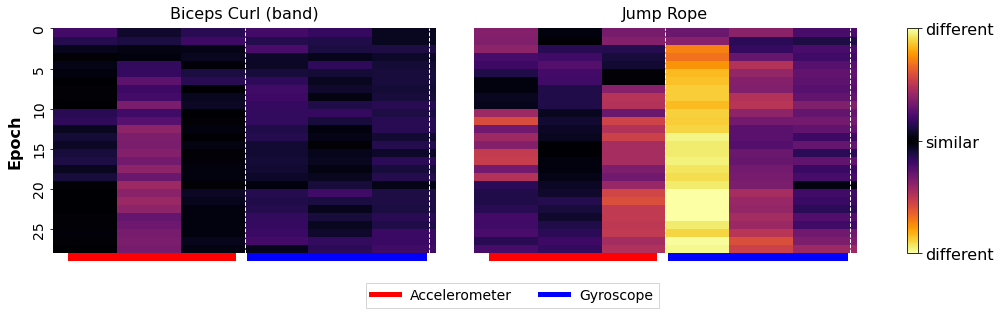

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4),
                         gridspec_kw={'wspace':0.1},
                         constrained_layout=True, )
abs_value = 0.03
# set title for all subplots, set y tick labels false for all but the first
#fig.suptitle('Channel Attention Score Difference with Biceps Curl', fontsize=20, fontweight='bold', y=1.1, x=0.46)
sns.heatmap(diff_bicep_curl, ax=axes[0], cmap=mymap, cbar=False, vmin=-abs_value, vmax=abs_value)
# place spacing between title and subplot
axes[0].set_title('Biceps Curl (band)', fontsize=16,  pad=10)
# set y tick labels np.arange(0, 10, 2)


sns.heatmap(diff_bicep_squat, ax=axes[1], cmap=mymap, cbar=False, vmin=-abs_value, vmax=abs_value)
axes[1].set_title('Jump Rope', fontsize=16,  pad=10)

for i in range(2):
    # remove xticklabels
    axes[i].set_xticklabels([])
    # remove yticklabels
    axes[i].set_yticklabels([])
    # remove xticks
    axes[i].set_xticks([])
    # remove yticks
    axes[i].set_yticks([])
    # place red vertical line at 3
    trans = axes[i].get_xaxis_transform()
    axes[i].plot([0.3,2.8],[-0.015,-0.015], color="red", transform=trans, clip_on=False, linewidth=8)
    axes[i].plot([3.1,5.8],[-0.015,-0.015], color="blue", transform=trans, clip_on=False, linewidth=8)
    # axes[i].plot([6.2,10.1],[-0.011,-0.011], color="green", transform=trans, clip_on=False, linewidth=8)
    # axes[i].plot([10.2,13.6],[-0.011,-0.011], color="#F09436", transform=trans, clip_on=False, linewidth=8)
    axes[i].axvline(x=3, color='w', linestyle='--', linewidth=1)
    axes[i].axvline(x=5.9, color='w', linestyle='--', linewidth=1)

    
# create legends for the axvlines 
fig.subplots_adjust(bottom=0.1, wspace=0.33)
axes[0].legend(['Accelerometer', 'Gyroscope'], fontsize=14,loc='upper center', 
             bbox_to_anchor=(1.2, -0.1),fancybox=False, shadow=False, ncol=4)
leg = axes[0].get_legend()
for line in leg.get_lines():
    line.set_linewidth(5.0)
# # set y ticks
axes[0].set_yticks(np.arange(0, 30, 5))
# set y tick label for the first axes
axes[0].set_yticklabels(np.arange(0, 30, 5), fontsize=14)
# set y label
axes[0].set_ylabel('Epoch', fontsize=16, fontweight='bold', labelpad=10)

cbar = fig.colorbar(axes[1].collections[0], ax=axes,location='right', shrink=1,
             label='', ticks=[-abs_value, 0, abs_value])
# # set cbar label fontsize

# # set yticklabels and large font size
cbar.ax.set_yticklabels(['different', 'similar', 'different'], fontsize=16)

# # save
plt.savefig('results/ms_activity/channel_attention_score_msactivity_difference.png', dpi=300, bbox_inches='tight')